In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# observe raw data:

In [2]:
df = pd.read_csv('./housePrice.csv')
print(df.count())
df.head()


Area          3479
Room          3479
Parking       3479
Warehouse     3479
Elevator      3479
Address       3456
Price         3479
Price(USD)    3479
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### merge address that are close together: 

In [3]:
df = df.dropna()
df["Address"] = df['Address'].str.split(" ").str.get(-1)
print(df.count())
df.head()


Area          3456
Room          3456
Parking       3456
Warehouse     3456
Elevator      3456
Address       3456
Price         3456
Price(USD)    3456
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Gharb,7.000000e+09,233333.33


### purge wrong Addresses

In [4]:
pd.to_numeric(df['Address'], errors='coerce')
print(df.count())
df.head()


Area          3456
Room          3456
Parking       3456
Warehouse     3456
Elevator      3456
Address       3456
Price         3456
Price(USD)    3456
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Gharb,7.000000e+09,233333.33


## purge wrong Areas

In [5]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df.dropna()
print(df.count())
df.head()

Area          3450
Room          3450
Parking       3450
Warehouse     3450
Elevator      3450
Address       3450
Price         3450
Price(USD)    3450
dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Gharb,7.000000e+09,233333.33


## Encode the Addresses:

In [6]:
lblAddress = LabelEncoder()
df["Address"] = lblAddress.fit_transform(df["Address"])
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,149,1.850000e+09,61666.67
1,60.0,1,True,True,True,149,1.850000e+09,61666.67
2,79.0,2,True,True,True,118,5.500000e+08,18333.33
3,95.0,2,True,True,True,128,9.025000e+08,30083.33
4,123.0,2,True,True,True,55,7.000000e+09,233333.33


# check our data visually

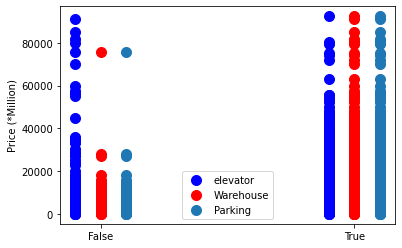

In [7]:

plt.scatter(df['Elevator'] - .1, df['Price'] / 1000_000, s=100, color='blue', label = "elevator")
plt.scatter(df['Warehouse'] , df['Price'] / 1000_000, s=100, color='red', label = "Warehouse")
plt.scatter(df['Parking'] + .1, df['Price'] / 1000_000, s=100, label = "Parking")

plt.legend()
plt.xticks([0, 1], ['False', 'True'])
plt.ylabel("Price (*Million)")
plt.show()

apparently elevator is not that important 

lets check Areas

## check if there is a connection between Area and Addresses:

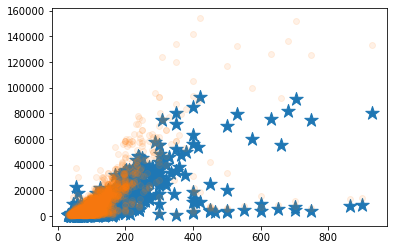

In [8]:
x = np.asanyarray(df["Area"])
y = np.asanyarray(df["Price"] / 1000_000)
y2= np.asanyarray(df["Price(USD)"] *50_000 / 1000_000)
plt.scatter(x, y, marker='*', s=200)
plt.scatter(x, y2, alpha=0.1)
plt.show()

### its almost a linear regression and since Rial and Dolor Prices increase together we only use Rial price from now on  

lets check with a linear regression

In [9]:
df = df.drop(columns="Price(USD)")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,True,True,True,149,1.850000e+09
1,60.0,1,True,True,True,149,1.850000e+09
2,79.0,2,True,True,True,118,5.500000e+08
3,95.0,2,True,True,True,128,9.025000e+08
4,123.0,2,True,True,True,55,7.000000e+09


0.461076928844923


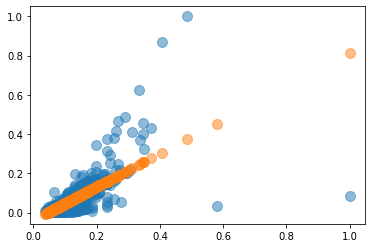

In [10]:
msk = np.random.rand(len(df)) < .8
train = df[msk]
test = df[~msk]

train_norm_area = train["Area"] / np.max(train['Area'])
train_norm_price = train["Price"] / np.max(train["Price"])

test_norm_area = test["Area"] / np.max(test['Area'])
test_norm_price = test["Price"] / np.max(test["Price"])


regr = linear_model.LinearRegression()

x = np.asanyarray(train_norm_area).reshape(-1, 1)  # Fix here
y = np.asanyarray(train_norm_price)

regr.fit(x, y)

# y_hat = regr.predict(np.asanyarray([test_norm_area]))
y_hat = regr.predict(np.asanyarray(test_norm_area).reshape(-1, 1))

print(r2_score(test_norm_price, y_hat))

plt.scatter(test_norm_area, test_norm_price, label = "Actual Price", alpha=.5, s=100)
plt.scatter(test_norm_area, y_hat, label = "Predicted Price", alpha=.5, s=100)
plt.show()

## not a good r2_score here ! 

not accurate but lets create a linear regression for it:

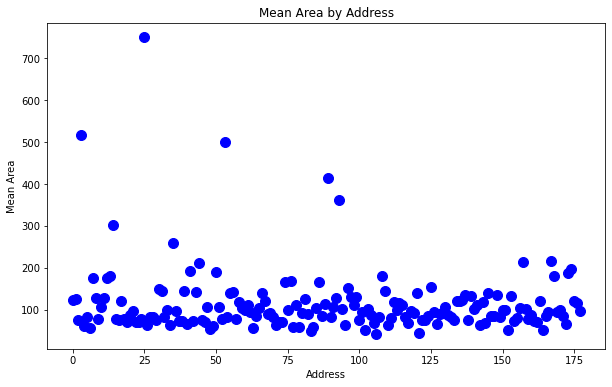

In [11]:
clustered_data = df.groupby('Address')['Area'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['Address'], clustered_data['Area'], s=100, color='blue')

plt.xlabel('Address')
plt.ylabel('Mean Area')
plt.title('Mean Area by Address')
plt.show()


almost nothing !!
they are both independent from each other

## lets check if there is a connection between Addresses and Prices:

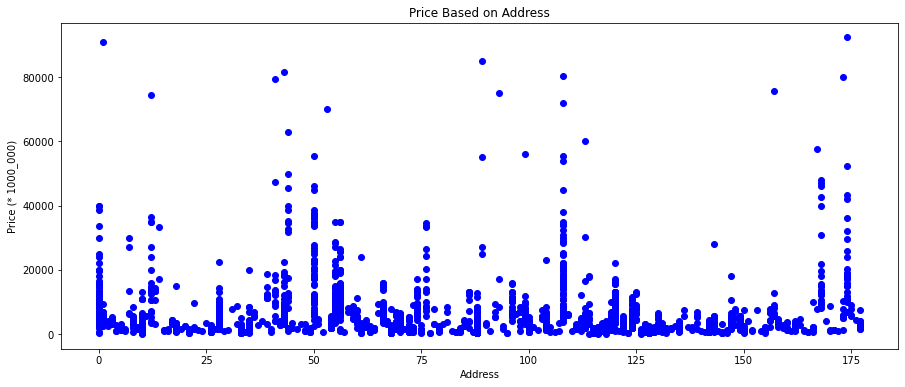

In [12]:
plt.figure(figsize=(15, 6))
plt.scatter(df['Address'], df['Price'] / 1_000_000, color='blue')
plt.title("Price Based on Address")
plt.xlabel("Address")
plt.ylabel("Price (* 1000_000)")
plt.show()

#### clearly there is a connection between addresses and Prices mean
### lets check mean Price but address

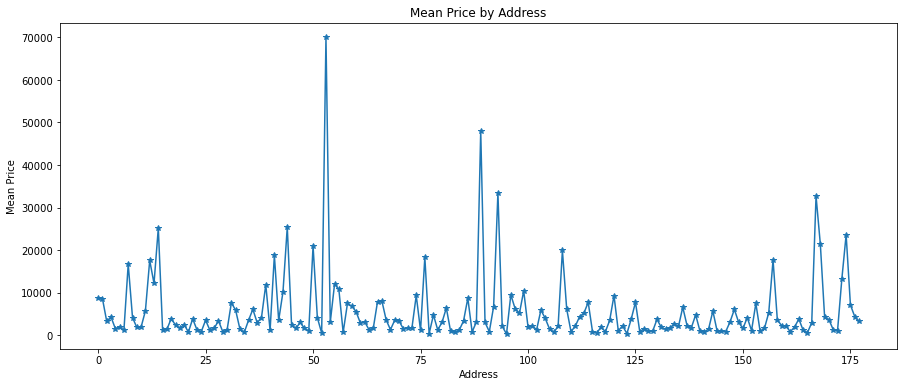

In [13]:
clustered_data = df.groupby('Address')['Price'].mean().reset_index()


plt.figure(figsize=(15, 6))


plt.plot(clustered_data['Address'].to_numpy(), clustered_data['Price'].to_numpy() / 1_000_000, '-*')

plt.xlabel('Address')
plt.ylabel('Mean Price')

plt.title('Mean Price by Address')
plt.show()

#### kinda looks like a sinus function 

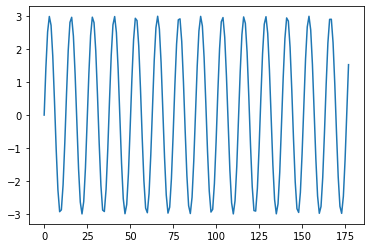

In [14]:
x = np.arange(178)
beta_1 = 3
beta_2 = 2
y = beta_1*np.sin(x/beta_2)
plt.plot(x, y)
plt.show()

lets find the proper $ beta_1 $ and $ beta_2 $

In [15]:
# create mask
msk = np.random.rand(len(clustered_data)) < .8
train_data = clustered_data[msk]
test_data = clustered_data[~msk]

In [16]:
def sinus_function(x, beta_1, beta_2):
    """ return Y for beta_1 and beta_2 """
    y  = beta_1 * np.sin(x / beta_2)
    return beta_1 * np.sin(x / beta_2)

coef, errors = curve_fit(sinus_function, train_data["Address"], train_data["Price"])

print(f"best Beta_1 is {coef[0]} and best Beta_2 is {coef[1]}")

best Beta_1 is 400.2087103204294 and best Beta_2 is -9.40105201905107


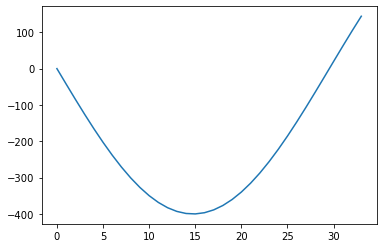

the r2_score is:  -0.20488591278773138


In [17]:
x = np.arange(len(test_data['Address']))
y_ = sinus_function(x, coef[0], coef[1])
y = test_data["Price"]
plt.plot(x, y_)
plt.show()

print("the r2_score is: ", r2_score(y, y_))

## clearly the result is not good at all

In [18]:
df["Address"] = lblAddress.inverse_transform(df["Address"])
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,True,True,True,Shahran,1.850000e+09
1,60.0,1,True,True,True,Shahran,1.850000e+09
2,79.0,2,True,True,True,Pardis,5.500000e+08
3,95.0,2,True,True,True,Qods,9.025000e+08
4,123.0,2,True,True,True,Gharb,7.000000e+09


Using oneHot encoding

In [19]:
dfa = pd.get_dummies(df["Address"], prefix="Address")
df = pd.concat([df, dfa], axis=1)
print(df.count())
df.head()

Area                  3450
Room                  3450
Parking               3450
Warehouse             3450
Elevator              3450
                      ... 
Address_Zafar         3450
Address_Zaferanieh    3450
Address_Zargandeh     3450
Address_Zibadasht     3450
Address_force         3450
Length: 185, dtype: int64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Address_Abad,Address_Abazar,Address_Abbasabad,...,Address_Velenjak,Address_Villa,Address_Waterfall,Address_Yaftabad,Address_Yakhchiabad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht,Address_force
0,63.0,1,True,True,True,Shahran,1.850000e+09,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60.0,1,True,True,True,Shahran,1.850000e+09,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79.0,2,True,True,True,Pardis,5.500000e+08,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95.0,2,True,True,True,Qods,9.025000e+08,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123.0,2,True,True,True,Gharb,7.000000e+09,False,False,False,...,False,False,False,False,False,False,False,False,False,False


this time im going to use this formula:

$ Price = mean\_price_{address} \times Area \times \theta_{0} + Parking \times \theta_{1} + Warehouse \times \theta_{2} $

In [20]:
unique_addresses = df.columns[df.columns.str.startswith('Address_')]

mean_prices = pd.DataFrame(columns=['address', 'mean_price'])

mean_prices["address"] = unique_addresses
for i in unique_addresses:
    subset = df[df[i]]

    mean_prices.loc[mean_prices['address'] == i, 'mean_price'] = subset["Price"].mean()



y = df["Price"]
X = pd.concat([df, mean_prices.drop(columns="address")], axis=1)
for i in unique_addresses:
    condition = (X[i] == 1)

    mean_price_value = mean_prices[mean_prices['address'] == i].get('mean_price')
    X.loc[X[i] == 1, "mean_price"] = mean_price_value.iloc[-1]



def price_model(x, beta_1, beta_2, beta_3):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    y = x1 * x2 * beta_1 + x3 * beta_2 + x4 * beta_3
    return y


X = X.drop(X.index[-1])
X = X.drop(columns="Address")
x1 = X['mean_price'] / np.max(X['mean_price'])
x2 = X['Area'] / np.max(X['Area'])

msk = np.random.rand(len(X)) < .8
train_X = X[msk]
train_y = y[msk]

test_X = X[~msk]
test_y = y[~msk]

optimized_params, covariance = curve_fit(price_model, [train_X.mean_price, train_X.Area, train_X.Warehouse, train_X.Parking], train_y)
# optimized_params, covariance = curve_fit(price_model, [X.mean_price, X.Area, X.Warehouse, X.Parking], y)
y_hat = price_model([test_X.mean_price, test_X.Area, test_X.Warehouse, test_X.Parking], *optimized_params)
score = r2_score(test_y, y_hat)
print(f"r2 score = {score}")

r2 score = 0.7249318624210105


# finally an acceptable ___Score___ ! ! !

### lets create a chart for its error and all is done

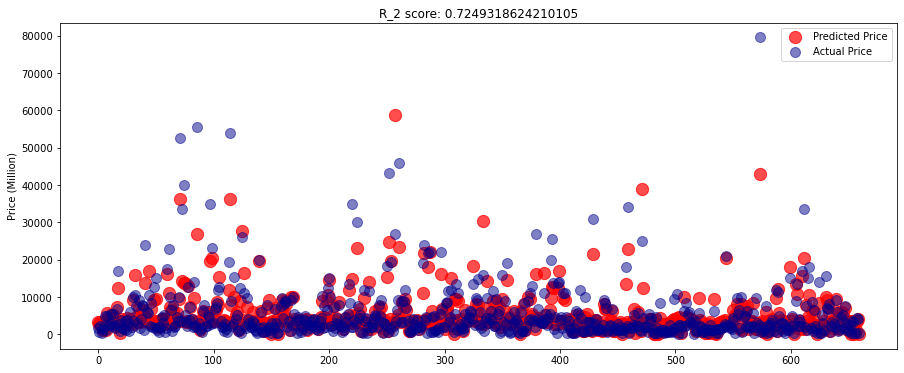

In [21]:
x = np.arange(len(y_hat))

# Create a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(x, y_hat / 1_000_000, alpha=.7, label="Predicted Price", color="red", s=150)
plt.scatter(x, test_y / 1_000_000, alpha=.5, label="Actual Price", color="darkblue", s=100)
plt.legend()
plt.ylabel("Price (Million)")
plt.title(f"R_2 score: {score}")

plt.show()